# MeerKAT conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 1.1.12a0 already installed.


## Download dataset

In [2]:
import toolviper

toolviper.utils.data.download(file="small_meerkat.ms")

[2026-01-21 13:12:43,958]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List     
 ────────────────── 
  small_meerkat.ms

[2026-01-21 13:12:43,961]     INFO    viperlog:  File exists: small_meerkat.ms 


Output()

## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "small_meerkat.ms"
main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "small_meerkat.ps.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    persistence_mode='w',
    main_chunksize=main_chunksize,
)

[2026-01-21 13:12:45,047]     INFO    viperlog:  Updated partition scheme used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID'] 
[2026-01-21 13:12:45,049]     INFO    viperlog:  Number of partitions: 3 
[2026-01-21 13:12:45,049]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [1], FIELD [0], SCAN [1], EPHEMERIS [None] 
[2026-01-21 13:12:45,386]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [2], FIELD [1], SCAN [2, 4, 6], EPHEMERIS [None] 
[2026-01-21 13:12:45,707]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [3], FIELD [2], SCAN [3, 5], EPHEMERIS [None] 


## Processing Set

In [4]:
from xradio.measurement_set import open_processing_set

ps_xdt = open_processing_set(ps_store=outfile)
ps_xdt.xr_ps.summary()

,name,scan_intents,shape,execution_block_UID,polarization,scan_name,spw_name,spw_intents,field_name,source_name,line_name,field_coords,session_reference_UID,scheduling_block_UID,project_UID,start_frequency,end_frequency
0,small_meerkat_0,"[CALIBRATE_BANDPASS, CALIBRATE_FLUX]","(74, 6, 50, 4)",---,"[XX, XY, YX, YY]",[1],spw_0,[UNSPECIFIED],[J1939-6342_0],[J1939-6342_0],[],"[fk5, 19h39m25.03s, -63d42m45.60s]",---,---,20231115-0022,3.265869e+09,3.276337e+09
1,small_meerkat_1,"[CALIBRATE_PHASE, CALIBRATE_AMPLI]","(42, 6, 50, 4)",---,"[XX, XY, YX, YY]","[2, 4, 6]",spw_0,[UNSPECIFIED],[J1619-8418_1],[J1619-8418_1],[],"[fk5, 16h19m33.97s, -84d18m19.10s]",---,---,20231115-0022,3.265869e+09,3.276337e+09
2,small_meerkat_2,[TARGET],"(223, 6, 50, 4)",---,"[XX, XY, YX, YY]","[3, 5]",spw_0,[UNSPECIFIED],[J0358-8103_2],[J0358-8103_2],[],"[fk5, 3h58m31.50s, -81d03m45.70s]",---,---,20231115-0022,3.265869e+09,3.276337e+09


In [5]:
ms_xdt = ps_xdt["small_meerkat_0"]
ms_xdt

<xarray.DataTree 'small_meerkat_0'>
Group: /small_meerkat_0
│   Dimensions:                     (time: 74, baseline_id: 6, frequency: 50,
│                                    polarization: 4, uvw_label: 3)
│   Coordinates:
│     * time                        (time) float64 592B 1.7e+09 1.7e+09 ... 1.7e+09
│     * baseline_id                 (baseline_id) int64 48B 0 1 2 3 4 5
│     * frequency                   (frequency) float64 400B 3.266e+09 ... 3.276e+09
│     * polarization                (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│       baseline_antenna1_name      (baseline_id) <U4 96B dask.array<chunksize=(6,), meta=np.ndarray>
│       baseline_antenna2_name      (baseline_id) <U4 96B dask.array<chunksize=(6,), meta=np.ndarray>
│       field_name                  (time) <U32 9kB dask.array<chunksize=(74,), meta=np.ndarray>
│       scan_name                   (time) <U21 6kB dask.array<chunksize=(74,), meta=np.ndarray>
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 4kB dask.array<chunksize=(20, 6), meta=np.ndarray>
│       FLAG                        (time, baseline_id, frequency, polarization) bool 89kB dask.array<chunksize=(20, 6, 1, 4), meta=np.ndarray>
│       TIME_CENTROID               (time, baseline_id) float64 4kB dask.array<chunksize=(20, 6), meta=np.ndarray>
│       UVW                         (time, baseline_id, uvw_label) float64 11kB dask.array<chunksize=(20, 6, 3), meta=np.ndarray>
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 710kB dask.array<chunksize=(20, 6, 1, 4), meta=np.ndarray>
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 355kB dask.array<chunksize=(20, 6, 1, 4), meta=np.ndarray>
│   Attributes:
│       creation_date:     2026-01-21T18:12:45.077092+00:00
│       creator:           {'software_name': 'xradio', 'version': '1.1.12a0'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'observer': ['Kim McAlpine'], 'observing_log': "['una...
│       processor_info:    {'sub_type': '', 'type': ''}
│       schema_version:    4.0.0
│       type:              visibility
├── Group: /small_meerkat_0/antenna_xds
│       Dimensions:                 (antenna_name: 3, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U4 48B 'm000' 'm002' 'm063'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           mount                   (antenna_name) <U6 72B dask.array<chunksize=(3,), meta=np.ndarray>
│           polarization_type       (antenna_name, receptor_label) <U1 24B dask.array<chunksize=(3, 2), meta=np.ndarray>
│           station_name            (antenna_name) <U4 48B dask.array<chunksize=(3,), meta=np.ndarray>
│           telescope_name          (antenna_name) <U7 84B dask.array<chunksize=(3,), meta=np.ndarray>
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 24B dask.array<chunksize=(3,), meta=np.ndarray>
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 72B dask.array<chunksize=(3, 3), meta=np.ndarray>
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 48B dask.array<chunksize=(3, 2), meta=np.ndarray>
│       Attributes:
│           overall_telescope_name:  MeerKAT
│           relocatable_antennas:    False
│           type:                    antenna
└── Group: /small_meerkat_0/field_and_source_base_xds
        Dimensions:                       (field_name: 1, sky_dir_label: 2)
        Coordinates:
          * field_name                    (field_name) <U32 128B 'J1939-6342_0'
          * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
           

In [6]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 1kB
Dimensions:                       (field_name: 1, sky_dir_label: 2,
                                   baseline_id: 6, frequency: 50,
                                   polarization: 4, time: 74, uvw_label: 3)
Coordinates:
  * field_name                    (field_name) <U32 128B 'J1939-6342_0'
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * baseline_id                   (baseline_id) int64 48B 0 1 2 3 4 5
  * frequency                     (frequency) float64 400B 3.266e+09 ... 3.27...
  * polarization                  (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
  * time                          (time) float64 592B 1.7e+09 ... 1.7e+09
  * uvw_label                     (uvw_label) <U1 12B 'u' 'v' 'w'
    source_name                   (field_name) <U32 128B dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    FIELD_PHASE_CENTER_DIRECTION  (field_name, sky_dir_label) float64 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    SOURCE_DIRECTION              (field_name, sky_dir_label) float64 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    type:     field_and_source

In [7]:
ms_xdt.antenna_xds

<xarray.DataTree 'antenna_xds'>
Group: /small_meerkat_0/antenna_xds
    Dimensions:                 (time: 74, baseline_id: 6, frequency: 50,
                                 polarization: 4, uvw_label: 3, antenna_name: 3,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U4 48B 'm000' 'm002' 'm063'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        mount                   (antenna_name) <U6 72B dask.array<chunksize=(3,), meta=np.ndarray>
        polarization_type       (antenna_name, receptor_label) <U1 24B dask.array<chunksize=(3, 2), meta=np.ndarray>
        station_name            (antenna_name) <U4 48B dask.array<chunksize=(3,), meta=np.ndarray>
        telescope_name          (antenna_name) <U7 84B dask.array<chunksize=(3,), meta=np.ndarray>
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 48B 0 1 2 3 4 5
      * frequency               (frequency) float64 400B 3.266e+09 ... 3.276e+09
      * polarization            (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
      * time                    (time) float64 592B 1.7e+09 1.7e+09 ... 1.7e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 24B dask.array<chunksize=(3,), meta=np.ndarray>
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 72B dask.array<chunksize=(3, 3), meta=np.ndarray>
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 48B dask.array<chunksize=(3, 2), meta=np.ndarray>
    Attributes:
        overall_telescope_name:  MeerKAT
        relocatable_antennas:    False
        type:                    antenna

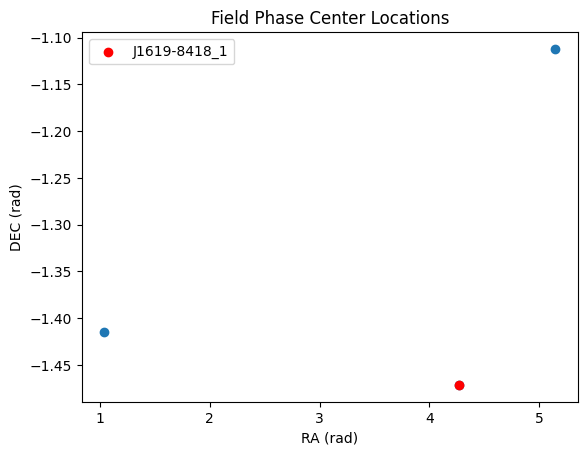

In [8]:
ps_xdt.xr_ps.plot_phase_centers()

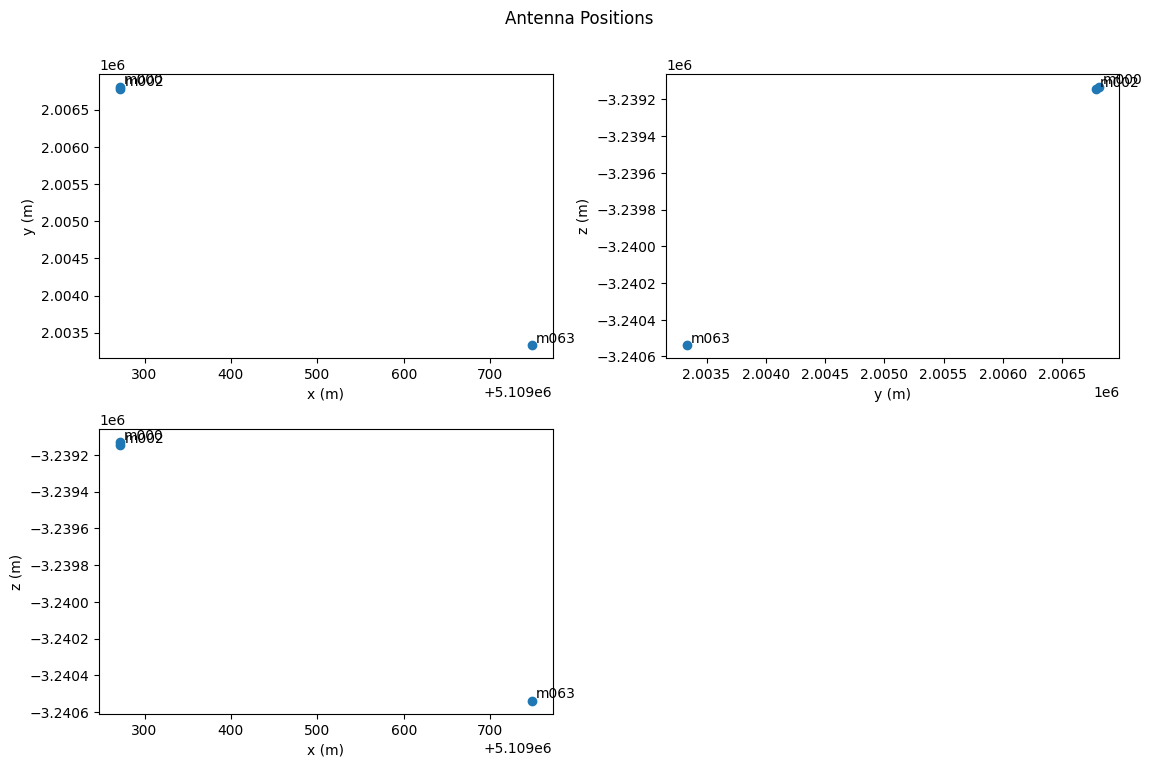

In [9]:
ps_xdt.xr_ps.plot_antenna_positions(label_all_antennas=True)